In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv('melb_data.csv')

In [47]:
print(df.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [10]:
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [48]:
median_area = df["BuildingArea"].median()
df.loc[:, "BuildingArea"] = df["BuildingArea"].fillna(median_area)

median_year = df["YearBuilt"].median()
df.loc[:, "YearBuilt"] = df["YearBuilt"].fillna(median_year)

print(f"Filled 'BuildingArea' missing values with median: {median_area}")
print(f"Filled 'YearBuilt' missing values with median: {median_year}")

Filled 'BuildingArea' missing values with median: 126.0
Filled 'YearBuilt' missing values with median: 1970.0


In [49]:
le = LabelEncoder()
label_cols = ["Type"]
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [50]:
X = df[['Rooms', 'Price', 'Bathroom', 'BuildingArea']]

In [51]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = model.fit_predict(X)

In [52]:
df['cluster'] = y_pred

In [53]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = df['cluster'][:train_size], df['cluster'][train_size:]


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
y_pred_test = model.predict(X_test_scaled)


/Users/mr.ghost/Documents/Machine Learning - Prelims/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [57]:
silhouette = silhouette_score(X_test_scaled, y_test)
ari = adjusted_rand_score(y_test, y_pred_test)

print(f"Silhouette Score: {silhouette}")
print(f"Adjusted Rand Score: {ari}")

Silhouette Score: 0.22771657097475667
Adjusted Rand Score: 0.0


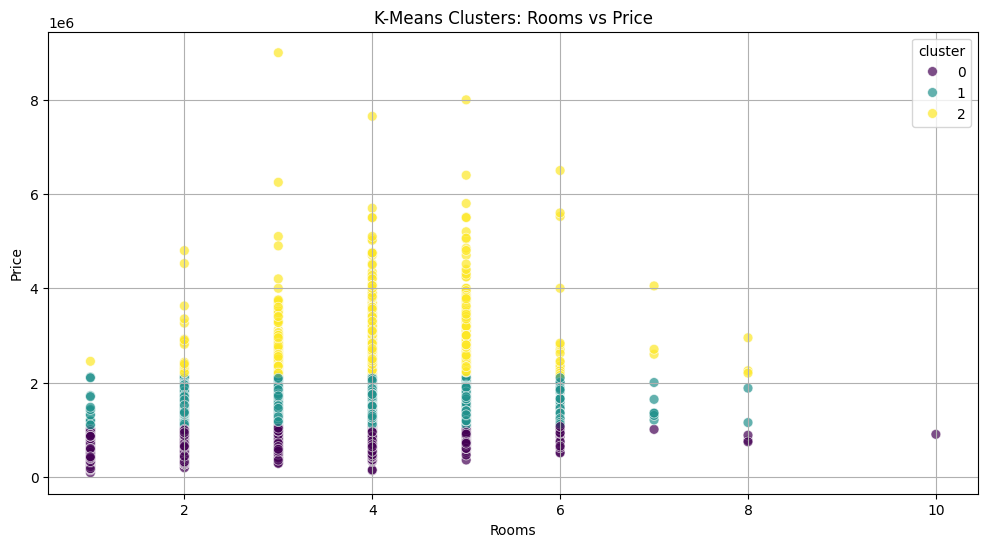

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rooms', y='Price', hue='cluster', palette='viridis', data=df, s=50, alpha=0.7)
plt.title('K-Means Clusters: Rooms vs Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.grid(True)
plt.show()

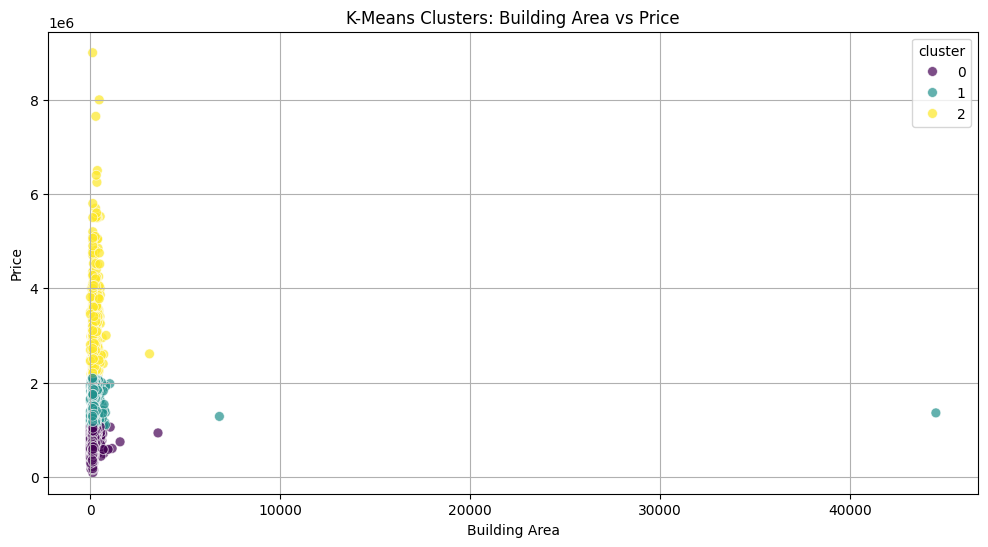

In [59]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BuildingArea', y='Price', hue='cluster', palette='viridis', data=df, s=50, alpha=0.7)
plt.title('K-Means Clusters: Building Area vs Price')
plt.xlabel('Building Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()